# Exercise 3 Gordeev

## Part I
Write a function to estimate the autocovariance function $\Gamma(\tau)$ with $\tau = (\tau_{\text{min}},\dots,\tau_{\text{max}})$ of a stochastic process and estimate autocovariance function for the residuals (annual cycle and trend removed - see Exercise 1) Hamburg Fuhlsbuettel temperature timeseries.    
Calculate biased (Eq.  2.2.7) estimators and compare results with implemented function in R or python.  What estimator is given there?  
  
Tip1:  
When you program the autocovariance function keep in mind that $\tau$ can also be negative!

Tip2:  
Recycle previous exercises ;)

Tip3:  
As function in python you can use acovf() from the statsmodels library  
https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html  
import the library with "import statsmodels.api as sm"
To find it you can search in the library via dir(sm)  
To get an overview of how to handel the function you can use help(sm....acovf)

In [1]:
import sys
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import det, inv, eig
import statsmodels.api as sm

In [2]:
smacovf=sm.tsa.stattools.acovf

In [3]:
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
jtplot.style(theme='chesterish')

In [4]:
!ls ../ex1

ex1_sin_regression.ipynb  tHAMBURG-FUHLS.nc
Exercise1_solution.ipynb  Untitled.ipynb


In [5]:
fname='../ex1/tHAMBURG-FUHLS.nc'
ds = xr.open_dataset(fname,decode_times=False)

In [6]:
# get the residuals 
# apply autocovariance function to the residuals

In [6]:
df=ds.to_dataframe()
df

,temp
time,
8412.0,1.1
8413.0,1.4
8414.0,1.9
8415.0,7.0
8416.0,10.9
...,...
8899.0,17.1
8900.0,14.7
8901.0,9.3


In [7]:
time=np.arange(len(ds.time))
n=len(ds.time)
X=ds.temp.values
# initialize guess vectors
H0=np.ones(n) # constant
H1=time # linear trend
H2=np.sin(2*np.pi*time/12) 
H3=np.cos(2*np.pi*time/12) 

In [8]:
H=np.stack([H0,H1,H2,H3],axis=1)
H.shape

(492, 4)

In [9]:
a=inv(H.T@H)@H.T@X
a

array([ 8.18496102e+00,  1.61110705e-03, -1.19500938e+00, -8.52079730e+00])

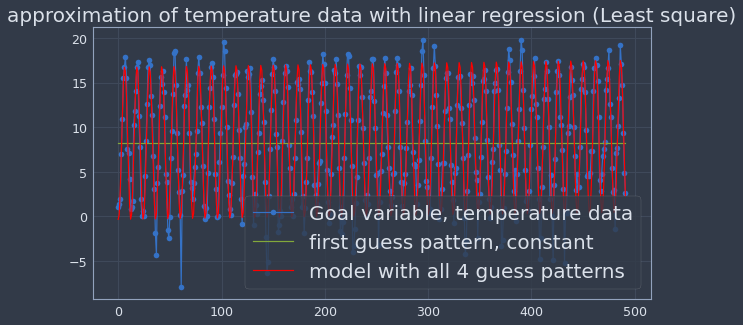

In [10]:
fig= plt.figure(figsize=(10,5))
plt.title("approximation of temperature data with linear regression (Least square)",fontsize=20)
plt.plot(ds.temp,"-o",label="Goal variable, temperature data")
plt.plot(a[0]*H[:,0],label='first guess pattern, constant')
plt.plot(a[0]*H[:,0]+a[1]*H[:,1]+a[2]*H[:,2]+a[3]*H[:,3],color='red',label="model with all 4 guess patterns")
plt.legend(fontsize=20);

Text(0.5, 1.0, 'residuals')

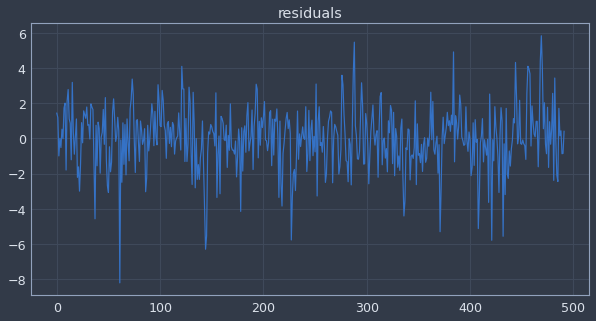

In [11]:
resid=(ds.temp-(a[0]*H[:,0]+a[1]*H[:,1]+a[2]*H[:,2]+a[3]*H[:,3])).values
fig= plt.figure(figsize=(10,5))
plt.plot(resid)
plt.title("residuals")

get autocovariance function

In [12]:
tmin=1
tmax=100
N=492

In [13]:
def autocov(tmin,tmax,xarr):
    N=len(xarr) # length of input array
    xmean=np.mean(xarr)
#     assert abs(tmin)<N | abs(tmax)<N
    
    tauarr = np.arange(tmin,tmax)
    autoarr = np.zeros(len(tauarr))
    for i in range(len(tauarr)):
#     autoarr[i]=autocov(tauarr[i],resid)
        xsum = 0
        tau = tauarr[i]
        for t in range(N-abs(tau)):
            xsum = xsum+(xarr[t] - xmean)*(xarr[t+tau]-xmean)

        curval=xsum/N
        autoarr[i]=curval
    
    return autoarr,tauarr

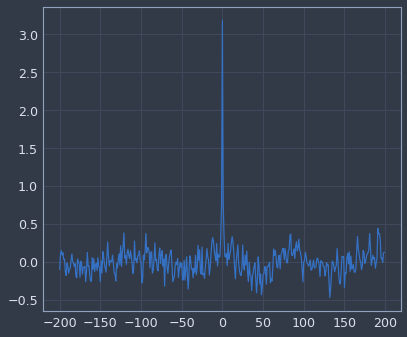

In [14]:
autoarr,tauarr = autocov(-200,200,resid)
plt.plot(tauarr,autoarr)

/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


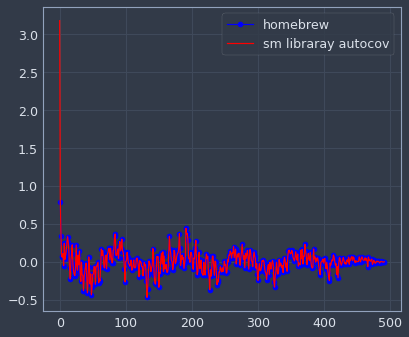

In [15]:
autoarr,tauarr=autocov(1,492,resid)
plt.plot(tauarr,autoarr,'-o',color='blue',label="homebrew")
plt.plot(smacovf(resid),color='red',label='sm libraray autocov')

plt.legend()

/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


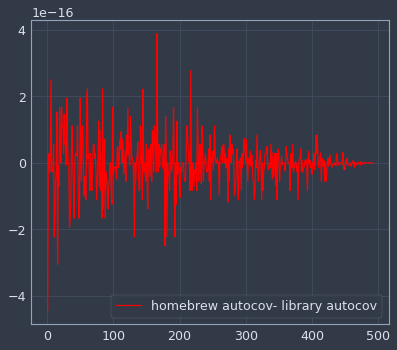

In [16]:
autoarr,tauarr=autocov(1,492,resid)
plt.plot(tauarr,autoarr-smacovf(resid)[1:],color='red',
         label='homebrew autocov- library autocov');
plt.legend();

## Part II (Homework)
Estimate the autocovariance function for the process from Exercise II  
  
 $X[t] = \alpha * ( X[t-1]-\mu[t-1] ) + \eta[t] + \mu[t]$  
   
 but without trend and annual cycle, i.e.$\mu(t)=a_0$.  Plot the average and standard deviation. 

 $X[t] = alpha * ( X[t-1]-mu[t-1] ) + eta[t] + mu[t]$
 
 with $mu[t] = a0 + a1 * t + a2 * cos(2*pi*t/12) + a3 * sin(2*pi*t/12)$  
 
 choose for the modell:  
 $a0=283.15$  
 $a1=0$  
 $a2=0$   
 $a3=0$   
 $\alpha=0.2$  
 
 and for $\eta$:  
 $\mu=0$  
 $\sigma=5$

In [19]:
def get_mu(nt,a0,a1,a2,a3):
    mu_arr = np.zeros(nt)
    time_arr = np.arange(nt)
    mu_arr = a0+a1*time_arr+a2*np.cos((2*np.pi*time_arr)/12) \
                  +a3*np.sin((2*np.pi*time_arr)/12)

    return mu_arr

In [20]:
def get_Xt(alpha,nt,x0,mu,sigma):
    WN_arr = np.random.normal(loc=mu,scale=sigma,size=nt)
    mu_arr =  get_mu(nt,a0,a1,a2,a3)
    x_arr  = np.zeros(nt)
    # set initial x
    x_arr[0] = x0
    # from 2nd to the last month
    
    for i in range(1,nt):
        x_arr[i] = alpha*(x_arr[i-1]-mu_arr[i-1])+WN_arr[i]+mu_arr[i]
        
    return x_arr, WN_arr, mu_arr

In [24]:
# MU(t) PARAMS

a0=283.15
a1=0 # no lienar trend 
a2=0 # no annual cycle
a3=0 # no annual cycle
a_list=[a0,a1,a2,a3]
alpha=0.2
# WHITE NOISE PARAMS
mu=0
sigma=5
# X(t) PARAMS
x0=a0 # Temperature initial condition
nt=120 # each timestep is a month

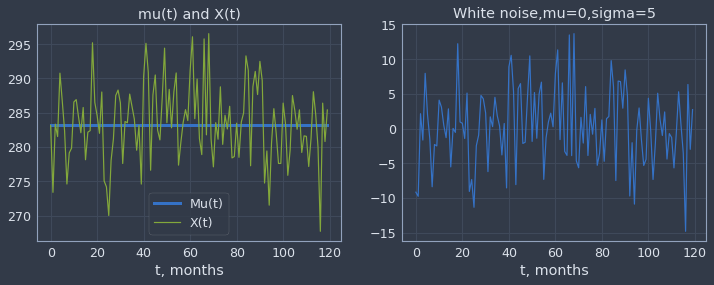

In [37]:
# generate X(t), eta(t) - white noise, Mu(t)
x_arr, WN_t, mu_t = get_Xt(alpha,nt,x0,mu,sigma)
# plot the resulting arrays
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(mu_t,label='Mu(t)',linewidth=3)
ax1.plot(x_arr,label='X(t)')
ax1.set_title("mu(t) and X(t)")
ax1.legend()

ax2.plot(WN_t)
ax2.set_title(f'White noise,mu={mu},sigma={sigma}');
[ax.set_xlabel("t, months") for ax in [ax1,ax2]];

Estimate the autocovariance function of particular X(t)

/home/igor/anaconda3/envs/MSC_env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


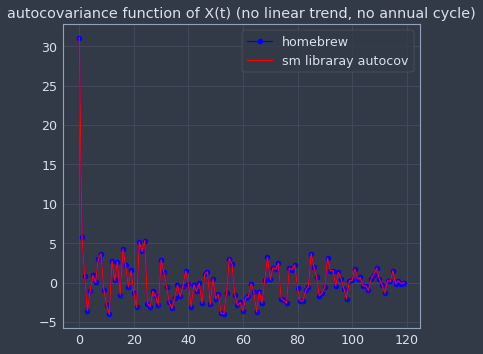

In [43]:
autoarr,tauarr=autocov(0,len(x_arr),x_arr)
plt.plot(tauarr,autoarr,'-o',color='blue',label="homebrew")
plt.plot(smacovf(x_arr),color='red',label='sm libraray autocov')
plt.title("autocovariance function of X(t) (no linear trend, no annual cycle)")
plt.legend();

### (i)
Generate a sample of processes $X(t)$ and derive estimate the covariancefunction $\hat{\gamma}(\tau)$ for each realization

In [46]:
n_realizations=200
nt=120
realizations_arr=np.ndarray([n_realizations,nt])

for realization in range(n_realizations):
    realizations_arr[realization],b,c=get_Xt(alpha,nt,x0,mu,sigma)
    
#     realizations_list.append(get_RW_realization(x0=0,dist_centre=0,RW_nelements=1000))

In [56]:
realizations_arr[:10,].shape

(10, 120)

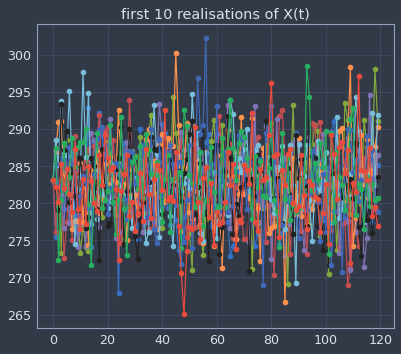

In [67]:
nplot=10
plt.plot(realizations_arr[:nplot,].T,'-o');
plt.title(f'first {nplot} realisations of X(t)');

In [178]:
variance_arr=np.zeros(nt)
for i in range(nt):
    mean=realizations_arr[i].mean()
    mean_dev=realizations_arr[0]-mean
    variance=np.mean(mean_dev**2)
    variance_arr[i]=variance

Text(0.5, 1.0, 'variances of every X(t) in a sample')

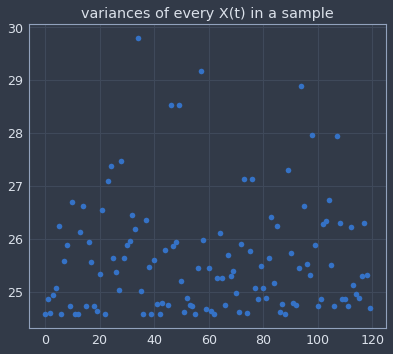

In [182]:
# variances of every X(t) in a sample
# these values corrsepond to the peaks of autocovariance functions for each X(t)
plt.plot(variance_arr,'o')
plt.title('variances of every X(t) in a sample')

estimate the covariance function for each realization

In [135]:
n_realizations=realizations_arr.shape[0]
nt=realizations_arr.shape[1]
autocov_arr=np.ndarray([n_realizations,nt])

for i  in range(n_realizations):
    autocov_arr[i],tau_arr=autocov(0,nt,realizations_arr[i])

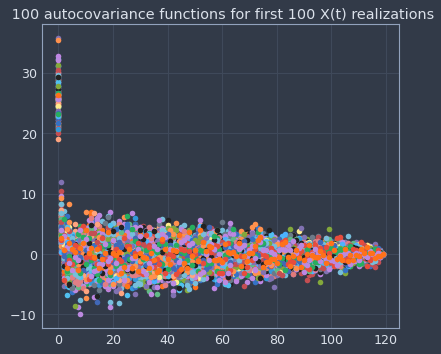

In [136]:
nplot=100
plt.plot(autocov_arr[0:nplot].T,'o');
plt.title(f' {nplot} autocovariance functions for first {nplot} X(t) realizations');

### (ii)
Plot the average over all realizations of $\hat{\gamma}(\tau) $ and the sample uncertainty (i.e.as +−one standard deviation) as a function of $\tau$.  Plot also the theoretical autocovariance function (see Eq.  2.2.26).

In [129]:
autocov_arr[:,0].shape

(200,)

In [152]:
average=np.zeros(nt)
stdarr=np.zeros(nt)
for i in range(nt):
    # average at each tau step over all realizations of X(t)
    average[i]=autocov_arr[:,i].mean()
    mean_deviations=autocov_arr[:,i]-average[i]
    std=np.sqrt(np.mean(mean_deviations**2))
    stdarr[i]=std

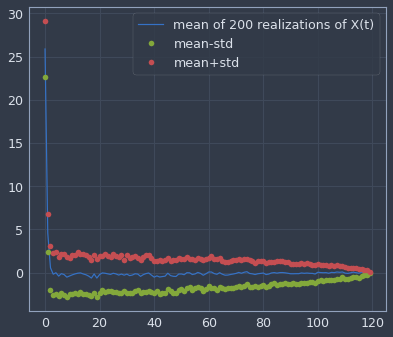

In [167]:
plt.plot(average,label=f'mean of {n_realizations} realizations of X(t)')
plt.plot(average-stdarr,'o',label='mean-std')
plt.plot(average+stdarr,'o',label='mean+std')
plt.legend();


 theoretical autocovariance function

In [187]:
alpha=0.2
# WHITE NOISE PARAMS
mu=0
sigma=5

In [188]:
autocov_theor=np.zeros(nt)

for tau in range(nt):
    value=(sigma**2/(1-alpha**2))*alpha**tau
    autocov_theor[tau]=value

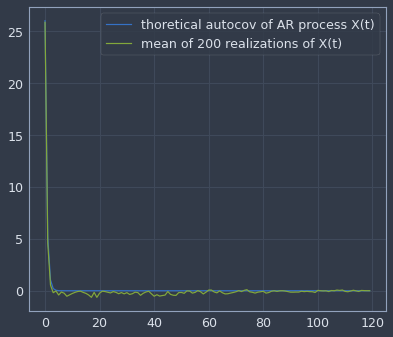

In [194]:
plt.plot(autocov_theor,label='thoretical autocov of AR process X(t)')
plt.plot(average,label=f'mean of {n_realizations} realizations of X(t)')
plt.legend();